# Data Vizualisation - Amazon Rainforest

Thiago Amado Costa

## Introduction

The Amazonia is a tropical rainforest that covers nine different countries, with approximately 6.74 million km², of which 60% is in Brazil.
The rainforest is the most biodiverse tropical rainforest in the world, home to 10% of all the wildlife species we know about, and is also home of more than 220 indigenous groups. It is also where the longest river system is, the Rio Amazonas, that is responsible for almost a sixth of all the fresh water that flows into the world's oceans.

Humid and hot, the Amazon region has all the typical attributes of a tropical environment. The average temperature is usually 27.9°C during the dry season and 25.8°C during the rainy season.The relative humidity is very high and averages 88% during the rainy season and 77% during the dry season. It rains and is hot almost every day of the year.

### Why is the Amazon Important ?

According to the [WWF](https://www.wwf.org.uk/where-we-work/amazon#:~:text=The%20Amazon%20is%20of%20vital,stored%20in%20the%20Amazon%20rainforest.), "The Amazon is of vital importance because people around the world, as well as locally, depend on the rainforest. Not just for food, water, wood and medicines, but to help stabilise the climate—150-200 billion tons of carbon is stored in the Amazon rainforest. The trees in the Amazon also release 20 billion tonnes of water into the atmosphere per day, playing a critical role in global and regional carbon and water cycles."




## Datasets

- [Brazilian Amazon Rainforest Degradation 1999-2019](https://www.kaggle.com/datasets/mbogernetto/brazilian-amazon-rainforest-degradation?select=inpe_brazilian_amazon_fires_1999_2019.csv)
    - Data collected by some Brazilian Government projects, organized by the INPE (National Institute for Space Research), using satellite imagery
- [Climate Weather Surface of Brazil](https://www.kaggle.com/datasets/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region/data)
    - Covers hourly weather data from 623 INMET (National Meteorological Institute) weathers stations of Brazil.

## What are the effects of the Deflorestation of the Amazon ?

To answer the first question, we will answer 3 sub-questions:
1. Did the amazon Rainforest Degradation change the average temperatures ?
2. Is there any corrrelation between the deflorestation and the number of fires in the amazon ?
3. Does the  El Niño and La Niña events impact the Amazon Fires ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as plty
import plotly.express as px
import plotly.io as pio
import json
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from urllib.request import urlopen

The [Amaozon Aid](https://amazonaid.org/resources/about-the-amazon/effects-of-deforestation-on-the-amazon/) listed 7 effects to the deflorestation of the Amazon :
- Disruption of Livelihoods of Amazonia Peoples
- Less Rain and Moisture and more fires
- Reduction of Biodiversity
- Higher Temperatures
- Pollution 
- Disruption of Migratory Corridors
- Erosion and degradation of the soil

The goal of this Data Analysis is to visualize and verify these effects, using the Amazon Rainforest Degradation and Climate Weather datasets. The Amazon Degradation dataset contains 3 datasets: 
1. The amount of firespots in the amazon per month, state and year
2. Deflorestation area per state and year
3. El Nino / La nina climatic phenomena per year


In [31]:
df_def_area = pd.read_csv("./data/def_area_2004_2019.csv")
df_def_area.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


- The Deflorestation Area dataset is composed of 11 columns (all the continuous columns are in $km^2$):
    - Ano/Estados (Year/States) : Year of occurence;
    - AC : Deflorestation area in the state of Acre  
    - AM : Deflorestation area in the state of Amazonas  
    - AP : Deflorestation area in the state of Amapa 
    - MA : Deflorestation area in the state of Maranhao 
    - PA : Deflorestation area in the state of Para 
    - RO : Deflorestation area in the state of Rondonia 
    - RR : Deflorestation area in the state of Roraima 
    - TO : Deflorestation area in the state of Tocantins 
    - AMZ LEGAL: Sum of deflorested area in all states  

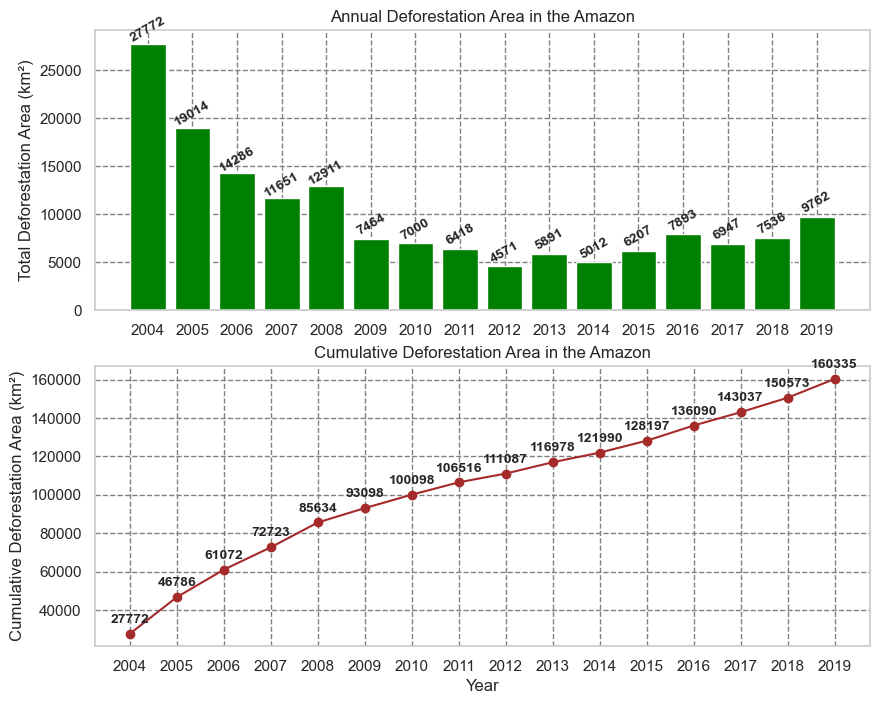

In [209]:
def add_label_per_value(ax, xvalues , rotate=False):
    angle = 30 if rotate else 0
    for i, value in enumerate(xvalues):
        ax.annotate(
            f"{value}",
            (df_def_area["Ano/Estados"][i], value),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
            fontsize=10,
            weight="bold",
            rotation=angle,
            va="center",
        )

_, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8))

ax1.bar(df_def_area["Ano/Estados"], df_def_area["AMZ LEGAL"], color="green")
ax1.set_title("Annual Deforestation Area in the Amazon")
ax1.set_ylabel("Total Deforestation Area (km²)")
ax1.set_xticks(list(range(2004, 2020)))
ax1.set_axisbelow(True)
ax1.grid(color="gray", linestyle="dashed")

add_label_per_value(ax1, df_def_area['AMZ LEGAL'], True)

cumulative_deforestation = df_def_area["AMZ LEGAL"].cumsum()
ax2.plot(
    df_def_area["Ano/Estados"],
    cumulative_deforestation,
    marker="o",
    linestyle="-",
    color="brown",
)
ax2.set_title("Cumulative Deforestation Area in the Amazon")
ax2.set_xlabel("Year")
ax2.set_ylabel("Cumulative Deforestation Area (km²)")
ax2.set_xticks(list(range(2004, 2020)))
ax2.set_axisbelow(True)
ax2.grid(color="gray", linestyle="dashed")

add_label_per_value(ax2, cumulative_deforestation)

plt.show()

As the graph shows, the deflorestation area in the Brazilian Amazon is very high, with a total of almost 160 335 km² of deflorested area in 2019.

Let's see some of the effects that this has.

### Did the amazon Rainforest Degradation change the local climate ?

Here, we are using the Climate Weather Surface of Brazil dataset, which covers hourly weather data from 623 INMET (National Meteorological Institute - Brazil) weathers stations.

The dataset is filtered by region, and here we consider only the north region, where the Amazonia is. It consists of the following columns:
- Date (YYYY-MM-DD)
- Time (HH:00)
- Amount of precipitation in millimetres (last hour)
- Atmospheric pressure at station level (mb)
- Maximum air pressure for the last hour (mb)
- Minimum air pressure for the last hour (mb)
- Solar radiation (KJ/m2)
- Air temperature (instant) (°c)
- Dew point temperature (instant) (°c)
- Maximum temperature for the last hour (°c)
- Minimum temperature for the last hour (°c)
- Maximum dew point temperature for the last hour (°c)
- Minimum dew point temperature for the last hour (°c)
- Maximum relative humid temperature for the last hour (%)
- Minimum relative humid temperature for the last hour (%)
- Relative humid (% instant)
- Wind direction (radius degrees (0-360))
- Wind gust in metres per second
- Wind speed in metres per second
- Brazilian geopolitical regions
- State (Province)
- Station Name (usually city location or nickname)
- Station code (INMET number)
- Latitude
- Longitude
- Elevation

For the plots, we will only consider the Amount of precipitation in millimetres (last hour), Maximum and Minimum temperature for the last hour (°c) and Relative humid (% instant)


#### data cleaning of climate weather surface dataset

In [ ]:
clim_df = pd.read_csv("./data/north.csv")
clim_df["year"] = clim_df["Data"].str.split("-", expand=True)[0] # getting only the year part 

columns_to_drop = ["index", "Hora", "station_code", "height", "station", "state", "Data",
        "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",
        "PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)",
        "PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)",
        "RADIACAO GLOBAL (Kj/m²)",
        "VENTO, DIREÇÃO HORARIA (gr) (° (gr))",
        "VENTO, RAJADA MAXIMA (m/s)",
        "VENTO, VELOCIDADE HORARIA (m/s)",
        "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",
        "UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)",
        "UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)",
        "TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)",
        "TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)",
    ]

clim_df.drop(
    columns=columns_to_drop,
    inplace=True,
)
clim_df.rename( # renaming bad names
    columns={
        "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)": "total_rain_mm",
        "TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)": "max_temperature",
        "TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)": "min_temperature",
        "UMIDADE RELATIVA DO AR, HORARIA (%)": "avg_relative_humidity",
    },
    inplace=True,
)

# dropping null values
clim_df.replace(-9999, pd.NA, inplace=True)
clim_df.dropna(inplace=True)

clim_df.to_csv("./data/north_cleaned.csv", index=False)

#### analysis

In [211]:
clim_df = pd.read_csv("./data/north_cleaned.csv")
clim_df.drop(columns=["region", "latitude", "longitude"], inplace=True)

grouped_clim_df = clim_df.groupby("year").mean().reset_index()
grouped_clim_df["avg_temperature"] = (
    grouped_clim_df["max_temperature"] + grouped_clim_df["min_temperature"]
) / 2

del clim_df

grouped_clim_df.head()

,year,total_rain_mm,TEMPERATURA DO PONTO DE ORVALHO (°C),max_temperature,min_temperature,avg_relative_humidity,avg_temperature
0,2000,0.145799,22.962782,27.285911,26.204111,81.022750,26.745011
1,2001,0.207545,22.775134,27.410610,26.373232,79.648538,26.891921
2,2002,0.285862,23.263159,27.661984,26.675196,80.544160,27.168590
3,2003,0.331458,22.890014,27.153124,26.018414,81.590529,26.585769
4,2004,0.344175,22.862031,26.954820,25.880757,82.113865,26.417788


In [94]:
def plot_with_trend_line(
    ax,
    x,
    y,
    title,
    xlabel,
    ylabel,
    color,
    degree=3,
    trend_line_color="#FA8072",
    st_year=2003,
    end_year=2021,
):
    ax.plot(
        x,
        y,
        marker="o",
        linestyle="-",
        color=color,
        label=ylabel,
    )
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    # trend line
    coeffs = np.polyfit(x, y, degree)
    trend_line = np.polyval(coeffs, x)
    ax.plot(x, trend_line, color=trend_line_color, linestyle="--", label="trend")
    ax.legend()

    ax.set_xticks(list(range(st_year, end_year)))
    ax.set_xlim(st_year, end_year)
    ax.set_axisbelow(True)
    ax.grid(color="gray", linestyle="dashed")

    return ax

- plotting the average temperature, relative humidity and total rainfall per year, with trendline

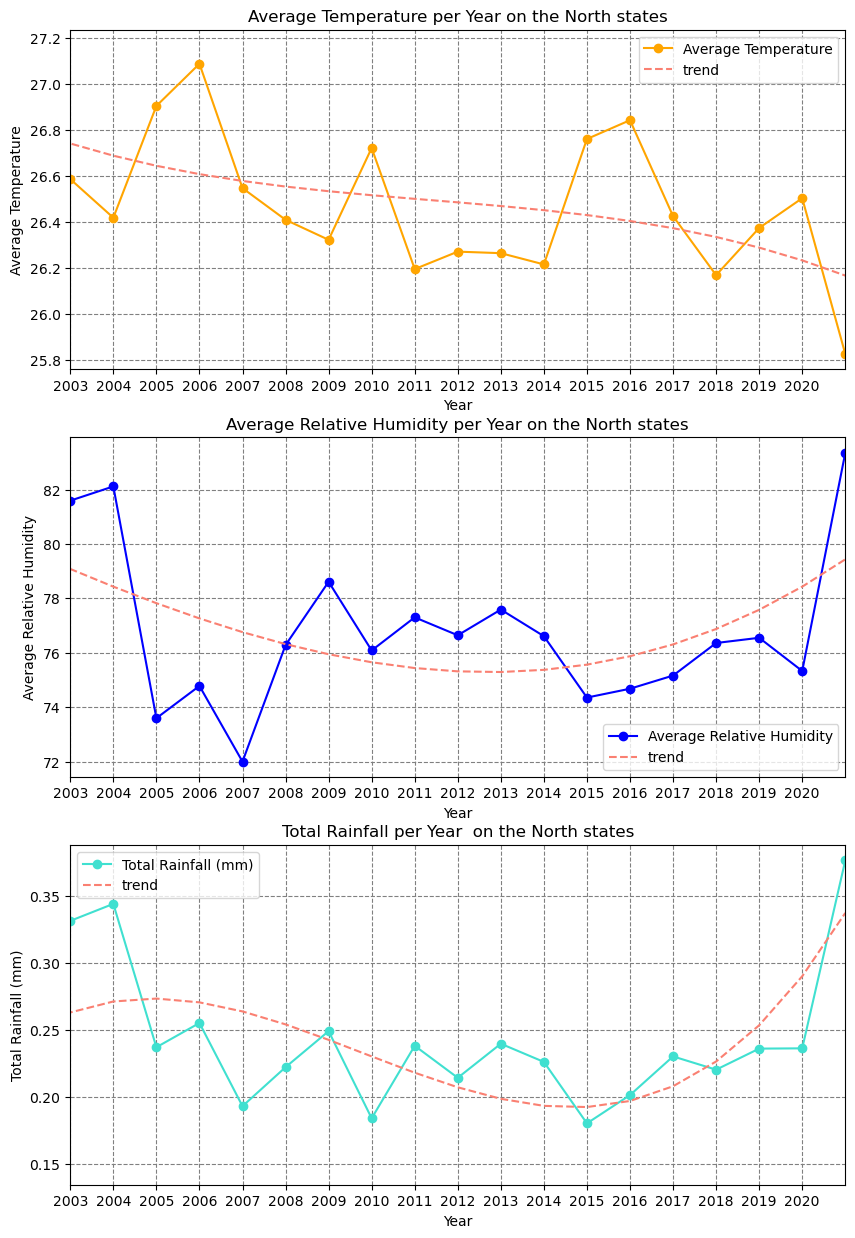

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))

x_values = grouped_clim_df["year"]
temperature_data = grouped_clim_df["avg_temperature"]
humidity_data = grouped_clim_df["avg_relative_humidity"]
rainfall_data = grouped_clim_df["total_rain_mm"]


plot_with_trend_line(
    ax1,
    x_values,
    temperature_data,
    "Average Temperature per Year on the North states",
    "Year",
    "Average Temperature",
    "orange",
)

plot_with_trend_line(
    ax2,
    x_values,
    humidity_data,
    "Average Relative Humidity per Year on the North states",
    "Year",
    "Average Relative Humidity",
    "blue",
)

plot_with_trend_line(
    ax3,
    x_values,
    rainfall_data,
    "Total Rainfall per Year  on the North states",
    "Year",
    "Total Rainfall (mm)",
    "#40E0D0",
)

plt.show()

Analysing the graphs and trendlines, it is possible to see that in 2005 and 2006 the average temperatures were high, and that could be a result of the peak deflorestations of 2004 and 2005. Also, from 2011 to 2014 the average temperature is below average, which corresponds to years that had less area of deflorestation. The increase of temperature in 2015 and 2016 also could be related to the increase of deflorested area.

It is also interesting to see that the Average relative humidity fell between 2005 and 2007, as a result of the peak deflorestations of 2004 and 2005, and increased again on 2008 and 2009, when the deflorested decreased. This shows the impact the deflorestation has on the local climate.

### How does the number of fires affect the deflorestation of the amazon ?

It is important to understand that the fires are not a natural phenomenon in the Amazon rainforest, they are ignited by people, intentionally, to steal/claim land to use with cattle ranching, growing animal feed or illegal logging.

With the INPE Amazon Fires dataset, it is possible to analyse the number of firespots in the brazilian states with the Amazon Rainforest. 
First, a map plot to analyse the number of fires on these states, from 1999 to 2019.


In [2]:
fires_df = pd.read_csv("./data/inpe_brazilian_amazon_fires_1999_2019.csv")
fires_df["state"] = fires_df["state"].str.capitalize()


# replacing names to correspont to how its written on the Brazil geojson
state_names_dict = {
    "Maranhao": "Maranhão",
    "Mato grosso": "Mato Grosso",
    "Para": "Pará",
    "Rondonia": "Rondônia",
    "Amapa": "Amapá",
}
fires_df["state"] = fires_df["state"].replace(state_names_dict)

grouped_fires_df = fires_df.groupby(["state", "year"])["firespots"].sum().reset_index()

del fires_df

In [3]:
with urlopen(
    "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
) as response:
    Brazil = json.load(response)
state_id_map = {}
for feature in Brazil["features"]:
    feature["id"] = feature["properties"]["name"]
    state_id_map[feature["properties"]["sigla"]] = feature["id"]

In [13]:
fig = px.choropleth_mapbox(
    grouped_fires_df,
    locations="state",
    geojson=Brazil,
    color="firespots",
    hover_name="state",
    hover_data=["firespots"],
    title="Number of firespots (Brazilian Amazon)",
    animation_frame="year",
    mapbox_style="carto-positron",
    center={"lat": -9, "lon": -55},
    zoom=2,
    opacity=0.5,
)

# fig.show()
# fig.write_html('output.html')

#### gif of the interactive map executed in previous cell

![map](map.gif)

Analysing the map, we can see that the number of fires is very high, specially on the states of Pará and Mato Grosso. For further analysis, let us see the average firespots by year, comparing to the Annual deflorestation area

In [213]:
average_firespots_per_year = (
    grouped_fires_df.groupby(["year"])["firespots"].mean().reset_index()
)
average_firespots_per_year["firespots"] = average_firespots_per_year["firespots"].round(
    2
)
# average_firespots_per_year

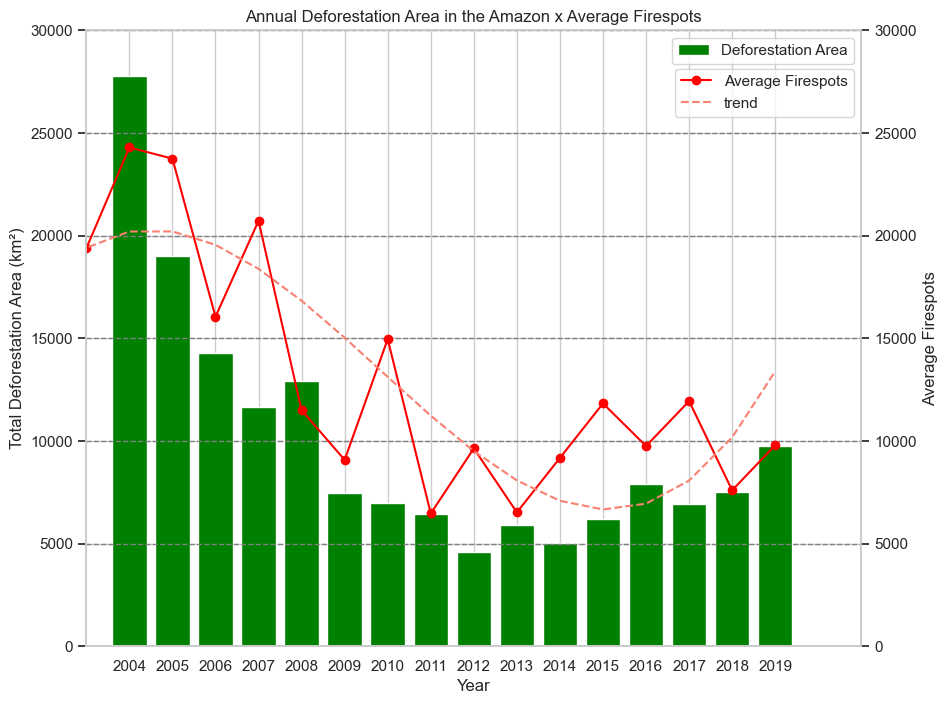

In [214]:
_, ax = plt.subplots(figsize=(10, 8))

ax.bar(
    df_def_area["Ano/Estados"],
    df_def_area["AMZ LEGAL"],
    color="green",
    label="Deforestation Area",
)
ax.set_title("Annual Deforestation Area in the Amazon x Average Firespots")
ax.set_ylabel("Total Deforestation Area (km²)")
ax.set_xticks(range(2004, 2020))
ax.set_ylim(0, 30000)

ax2 = ax.twinx()
ax2 = plot_with_trend_line(
    ax2,
    average_firespots_per_year["year"],
    average_firespots_per_year["firespots"],
    "",
    "",
    "Average Firespots",
    "red",
)
ax2.set_xticks(range(2004, 2020))
ax2.set_ylim(0, 30000)
ax2.set_ylim(0, 30000)

ax.set_ylabel("Total Deforestation Area (km²)")
ax.set_xlabel("Year")
ax.legend(loc="upper right")
ax2.legend(loc="upper right", bbox_to_anchor=(1.0, 0.95))

plt.show()

With this graph, it is clear to see that the average number of firespots affects directly the deflorestation area. According to the [WWF](https://www.wwf.org.uk/save-the-amazon/faqs#:~:text=The%20fires%20are%20a%20direct,comes%20first%20and%20fires%20follow.), the fires are often carried out illegaly to steal land and clear and prepare areas for cattle farming and agriculture. 
***"Deflorestation comes first and fires follow"***

### Are the El Niño and La Niña major factors that impact the Amazon ?

El Niño and La Niña are natural weather patterns that result from interactions between the ocean and the atmosphere. Both involve anomalies in ocean surface temperatures and atmospheric circulation, resulting in climatic extremes around the world.

El Niño tends to bring warmer and drier conditions to the Amazon Rainforest, while La Niña tends to bring cooler and wetter conditions. Both phenomena can disrupt the delicate balance of the Amazon's ecosystem, impacting biodiversity, river systems, and contributing to climate-related challenges. Understanding and monitoring these events are crucial for anticipating and managing the potential impacts on the Amazon Rainforest and other ecosystems around the world.

According to the [Amazon Aid](https://amazonaid.org/el-nino-affect-amazon-rainforest/), the El Niño "is the perfect condition to cause forest fires all over the Amazon", which is made worse by the fact seen previously, that these fires are used as a way to clear land illegaly.

Here, we check the impacts these phenomena have, to check the impact they have on the Amazon fires and Deflorestation.

In [215]:
nino_nina_df = pd.read_csv("data/el_nino_la_nina_1999_2019.csv")

alpha_map = {  # to color the plot axs
    "Weak": 0.5,
    "Moderate": 0.6,
    "Strong": 0.8,
    "Very Strong": 0.9,
}
nino_nina_df["alpha"] = nino_nina_df["severity"].map(alpha_map)

nino_nina_df.head()

,start year,end year,phenomenon,severity,alpha
0,2004,2005,El Nino,Weak,0.5
1,2006,2007,El Nino,Weak,0.5
2,2014,2015,El Nino,Weak,0.5
3,2018,2019,El Nino,Weak,0.5
4,2002,2003,El Nino,Moderate,0.6


In [216]:
nino_df = nino_nina_df[nino_nina_df["phenomenon"] == "El Nino"]
nina_df = nino_nina_df[nino_nina_df["phenomenon"] == "La Nina"]

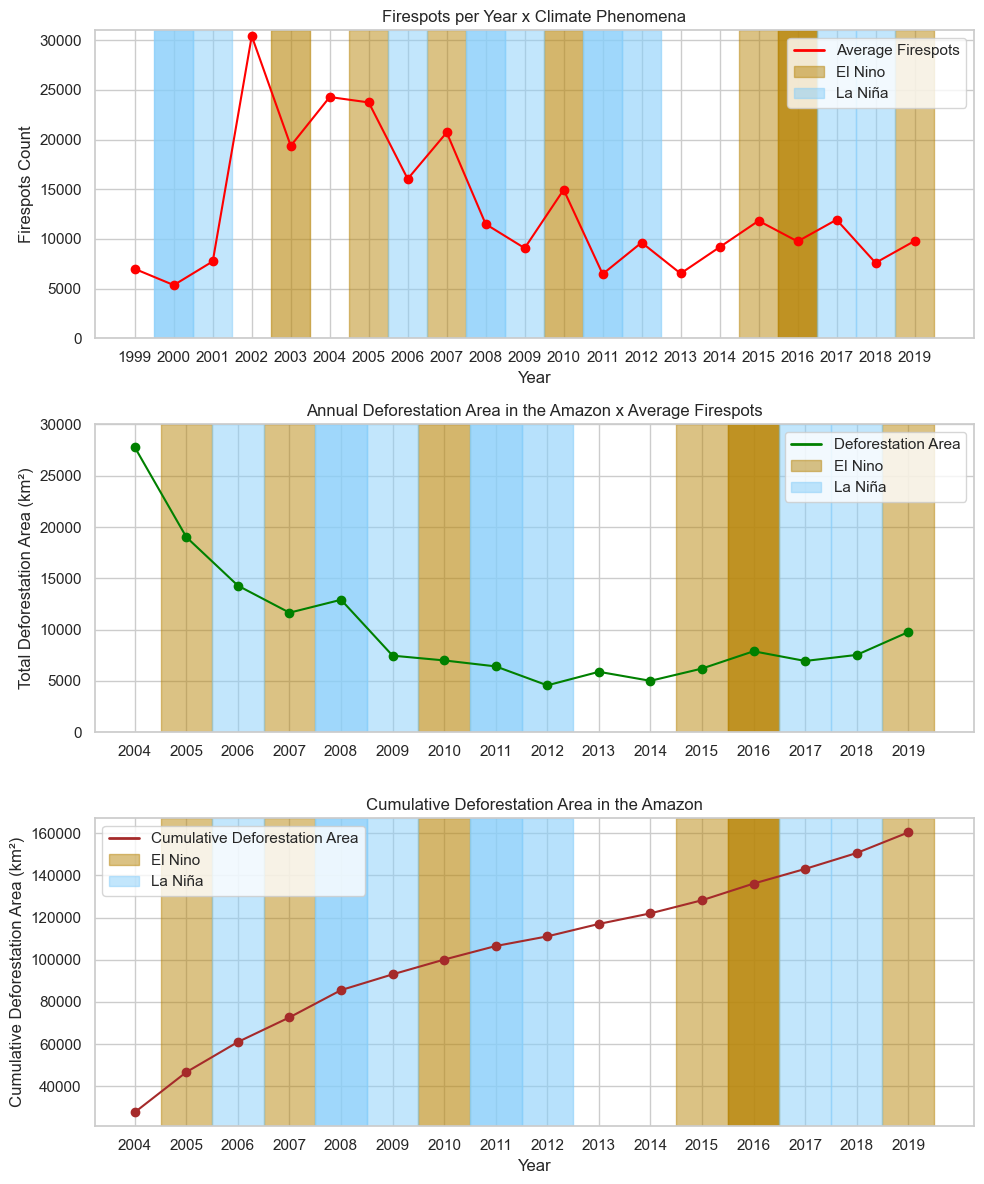

In [217]:
def color_axs_by_phenomenon_severity(ax, nino_df, nina_df, filter_year=False):
    if filter_year:
        nino_df = nino_df[nino_df["start year"] >= 2004]
        nina_df = nina_df[nina_df["start year"] >= 2004]

    for i, row in nino_df.iterrows():
        ax.axvspan(
            row["start year"] + 0.5,
            row["end year"] + 0.5,
            alpha=row["alpha"],
            color="darkgoldenrod",
            edgecolor=None,
            label="El Niño",
        )
    for i, row in nina_df.iterrows():
        ax.axvspan(
            row["start year"] + 0.5,
            row["end year"] + 0.5,
            alpha=row["alpha"],
            color="lightskyblue",
            edgecolor=None,
            label="La Niña",
        )
    return ax


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

ax1 = color_axs_by_phenomenon_severity(ax1, nino_df, nina_df)
ax1.plot(
    average_firespots_per_year["year"],
    average_firespots_per_year["firespots"],
    color="red",
    marker="o",
    linestyle="-",
    label="Average Firespots",
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Firespots Count")
ax1.set_title("Firespots per Year x Climate Phenomena")
ax1.set_xticks(range(1999, 2020))
ax1.set_ylim(0, 31000)

legend_elements = [
    Line2D([0], [0], color="red", lw=2, label="Average Firespots"),
    Patch(
        facecolor="darkgoldenrod", edgecolor="darkgoldenrod", label="El Nino", alpha=0.5
    ),
    Patch(
        facecolor="lightskyblue", edgecolor="lightskyblue", label="La Niña", alpha=0.5
    ),
]

ax1.legend(handles=legend_elements)


ax2 = color_axs_by_phenomenon_severity(ax2, nino_df, nina_df, True)
ax2.plot(
    df_def_area["Ano/Estados"],
    df_def_area["AMZ LEGAL"],
    color="green",
    marker="o",
    linestyle="-",
    label="Deforestation Area",
)
ax2.set_title("Annual Deforestation Area in the Amazon x Average Firespots")
ax2.set_ylabel("Total Deforestation Area (km²)")
ax2.set_xticks(range(2004, 2020))
ax2.set_ylim(0, 30000)

legend_elements_ax2 = [
    Line2D([0], [0], color="green", lw=2, label="Deforestation Area"),
    Patch(
        facecolor="darkgoldenrod", edgecolor="darkgoldenrod", label="El Nino", alpha=0.5
    ),
    Patch(
        facecolor="lightskyblue", edgecolor="lightskyblue", label="La Niña", alpha=0.5
    ),
]

ax2.legend(handles=legend_elements_ax2)


ax3 = color_axs_by_phenomenon_severity(ax3, nino_df, nina_df, True)
ax3.plot(
    df_def_area["Ano/Estados"],
    cumulative_deforestation,
    marker="o",
    linestyle="-",
    color="brown",
)
ax3.set_title("Cumulative Deforestation Area in the Amazon")
ax3.set_xlabel("Year")
ax3.set_ylabel("Cumulative Deforestation Area (km²)")
ax3.set_xticks(range(2004, 2020))

legend_elements_ax3 = [
    Line2D([0], [0], color="brown", lw=2, label="Cumulative Deforestation Area"),
    Patch(
        facecolor="darkgoldenrod", edgecolor="darkgoldenrod", label="El Nino", alpha=0.5
    ),
    Patch(
        facecolor="lightskyblue", edgecolor="lightskyblue", label="La Niña", alpha=0.5
    ),
]

ax3.legend(handles=legend_elements_ax3)

plt.tight_layout()
plt.show()

Looking at the first graph, it is clear to see that the highest number of fires occur with El Nino, and during La Nina they drop. This shows the El Nino is in fact the perfect condition to cause fires on the Amazon, as we can see in the yeas of 2003, 2004, 2005, 2007, 2010, 2015 and 2016.
It is also important to see that El Nino is not the reason as to why these forest fires occur, as we have seen previously, but it makes the situation worse, sometimes causing the fires to spread out of control and cause even more damage than it would.
This could explain the increase on the deflorestation areas in 2015 and 2016.


## Conclusions

This analysis only answer one part of the first question. The amazon is many times called the *lungs of the world*, and its deflorestation will cause and is causing many effects to the climate, as seen previously. To further analyse the impacts of the deflorestation on the climate, a better data preparation is necessary. Also, a better idea is to analyse the deflorestation not only of the Amazon, but also of other rainforests.

The second sub-question leaves more questions than answers. It is clear that the fires are related to the deflorestation, but currently there is not a lot of datasets available to analyse the origins of the fires, as many if not all of them are conducted illegaly, making it very hard to understand when and how they are conducted, if there is any patterns or what could be done to avoid it. 
It is a constant fight, and supporting organizations like the [Amazon Aid](https://amazonaid.org/), [Greenpeace](https://www.greenpeace.org), [WWF](https://www.worldwildlife.org/), and many others, is one of the best ways to help.

From this analysis, it is also clear the importance of the government investing more in research and science, to generate more data that could give more insights and answers to these questions, aiming to heal the Amazonia.